<a href="https://colab.research.google.com/github/Akashkunwar/dscodes/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg"></center><br>

# Using Machine Learning to Detect Credit Card Frauds

# Introduction<br>
Everyday **billions** of credit card transactions are made all around the world. Considering the widespread use of smartphones and the Internet throughout the earth, more and more people are using their credit cards to make purchases online, making payments through apps,etc...<br><br>
In a scenario such as this one, it is **extremely** important that credit card companies are able to easily recognize when a transaction is a result of a fraud or a genuine purchase, avoiding that customers end up being charged for items they did not acquire.<br><br>
In this project, I'll use the **scikit-learn** library to develop a prediction model that is able to learn and detect when a transaction is deriving from fraud or a genuine purchase. I intend to use some different classification algorithms and try to identify which one of them achieve the best results with our dataset.

# Importing Libraries

In [38]:
pip install opendatasets --quiet

In [39]:
pip install -U kaleido --quiet

In [40]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [41]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud')

# kunwarakash
# 28484dff151bf6535f78c0ef3529f7c4

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


# Obtaining Data

In [ ]:
data = pd.read_csv('/content/creditcardfraud/creditcard.csv')
pd.set_option('display.max_columns', None)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Getting to Know the Dataset<br>

The dataset <a href= "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a> contains credit card transactions that were made in September, 2013 by european clients during two days.<br><br>
The dataset has the feature **time**, which shows us the seconds elapsed between each transaction and the first transaction in the dataset. The feature **amount**, containing the transaction amount
and the feature **class**, which tells us if that certain transaction is genuine or a fraud, where 1 = fraud and 0 = genuine.<br><br>
Features V1, V2,... V28 are numerical input variables result of a <a href = "https://en.wikipedia.org/wiki/Principal_component_analysis">PCA transformation </a> whose content couldn't be displayed due to their **confidential** nature.

All attributes are made of **numerical inputs**. Most of them displays floating point numbers (*float*) while **class** displays integer(*int*) and represents the categorical class of each transaction, whether they're a fraud or genuine.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


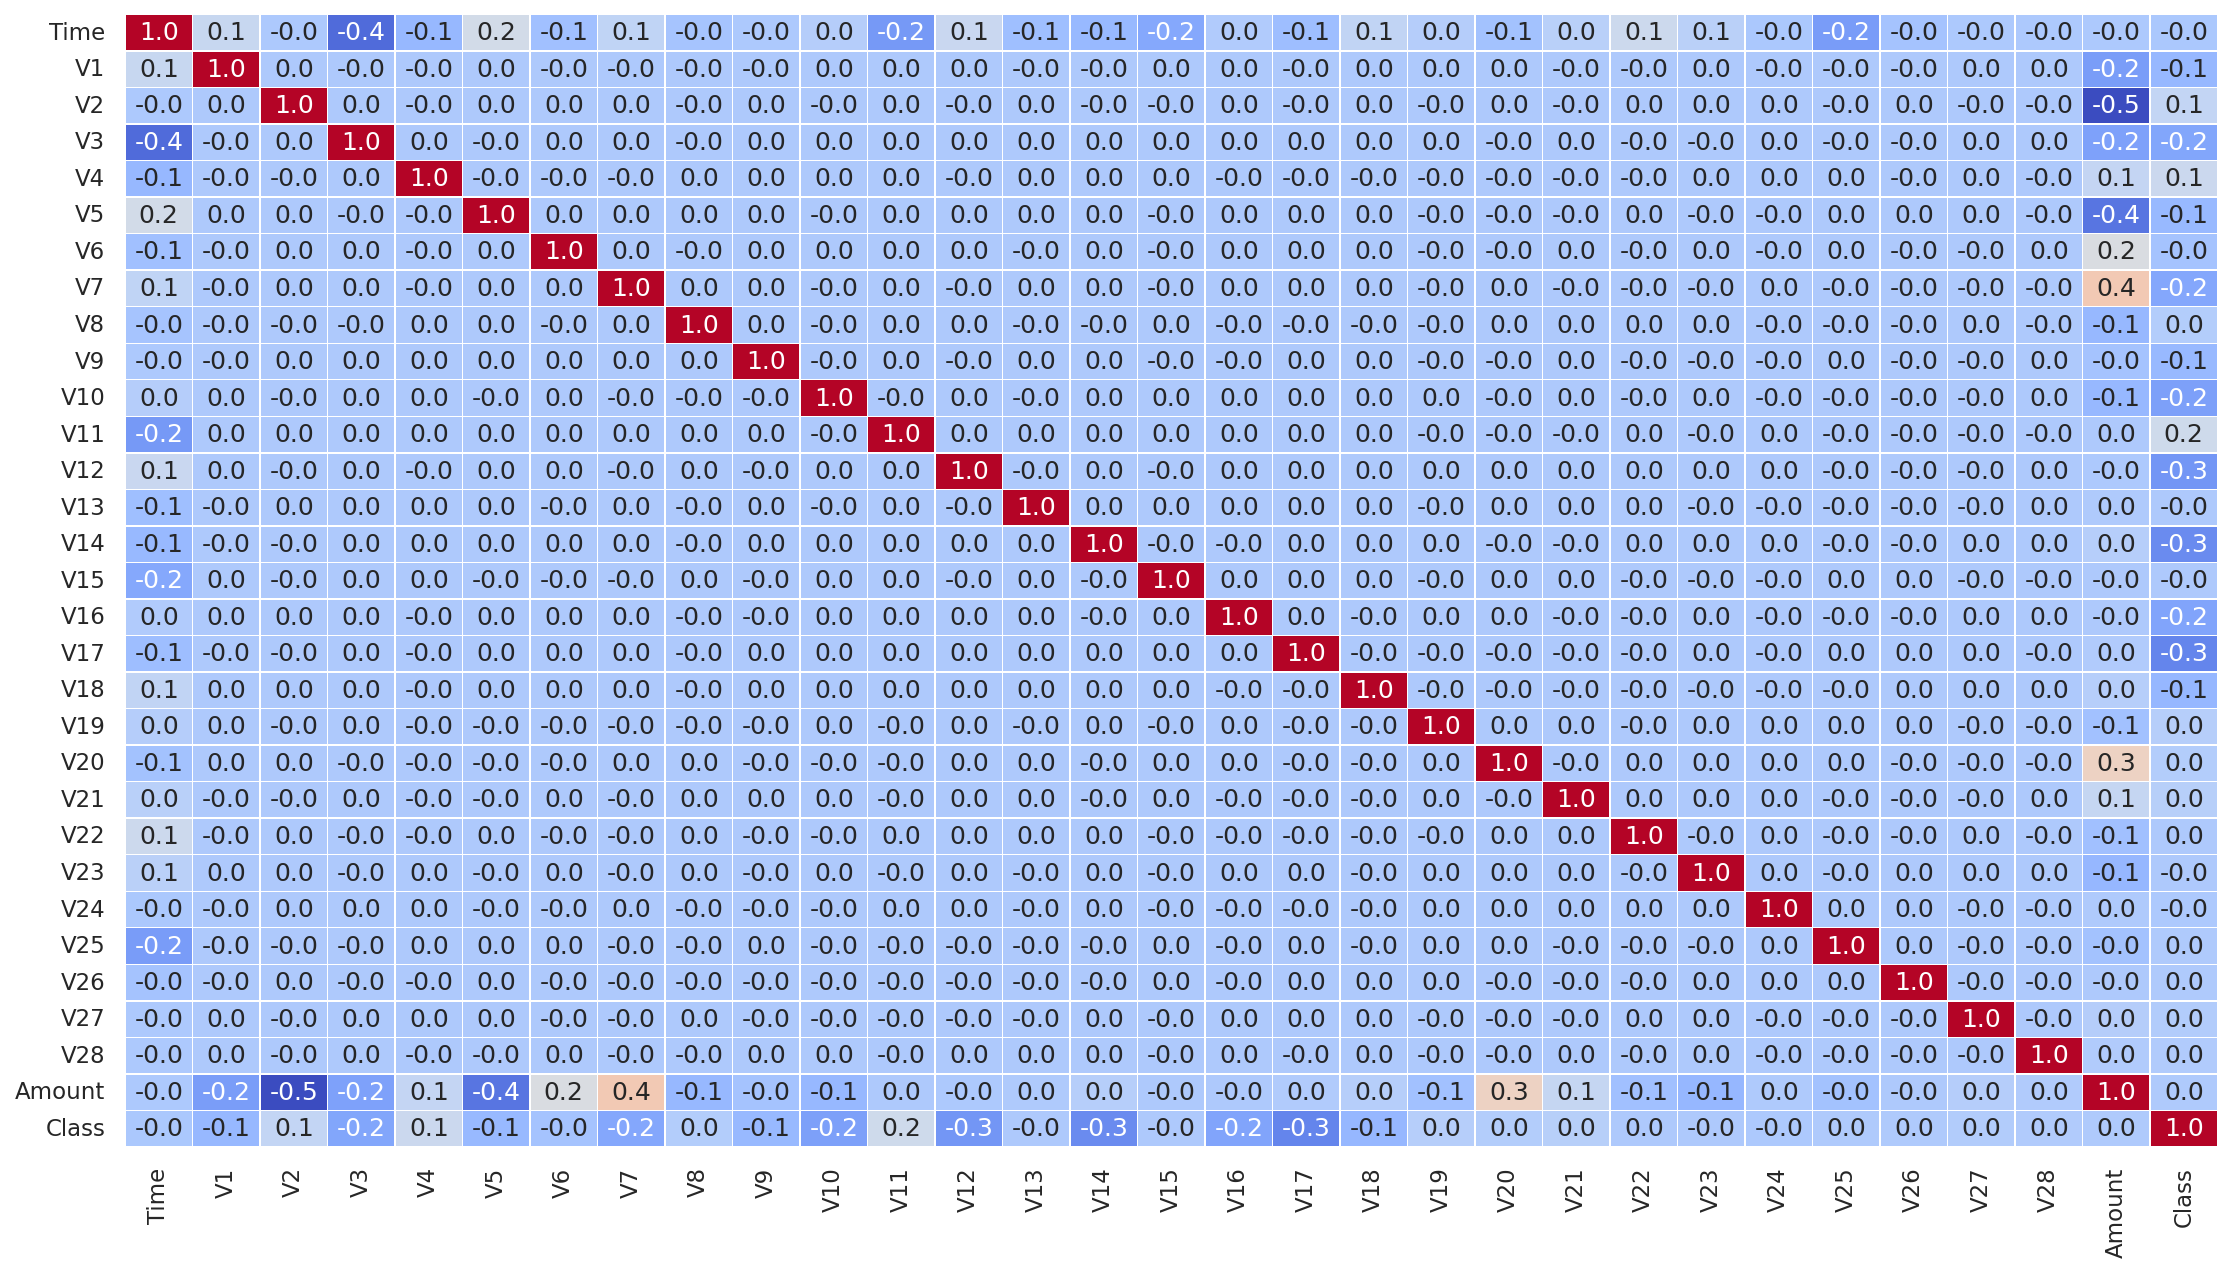

In [ ]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

**75%** of transactions in the analyzed period were **up to €77.16**.<br><br>
The **maximum amount** identified during this period was **€25,691.16**, way higher than the **average amount of €88.35**.

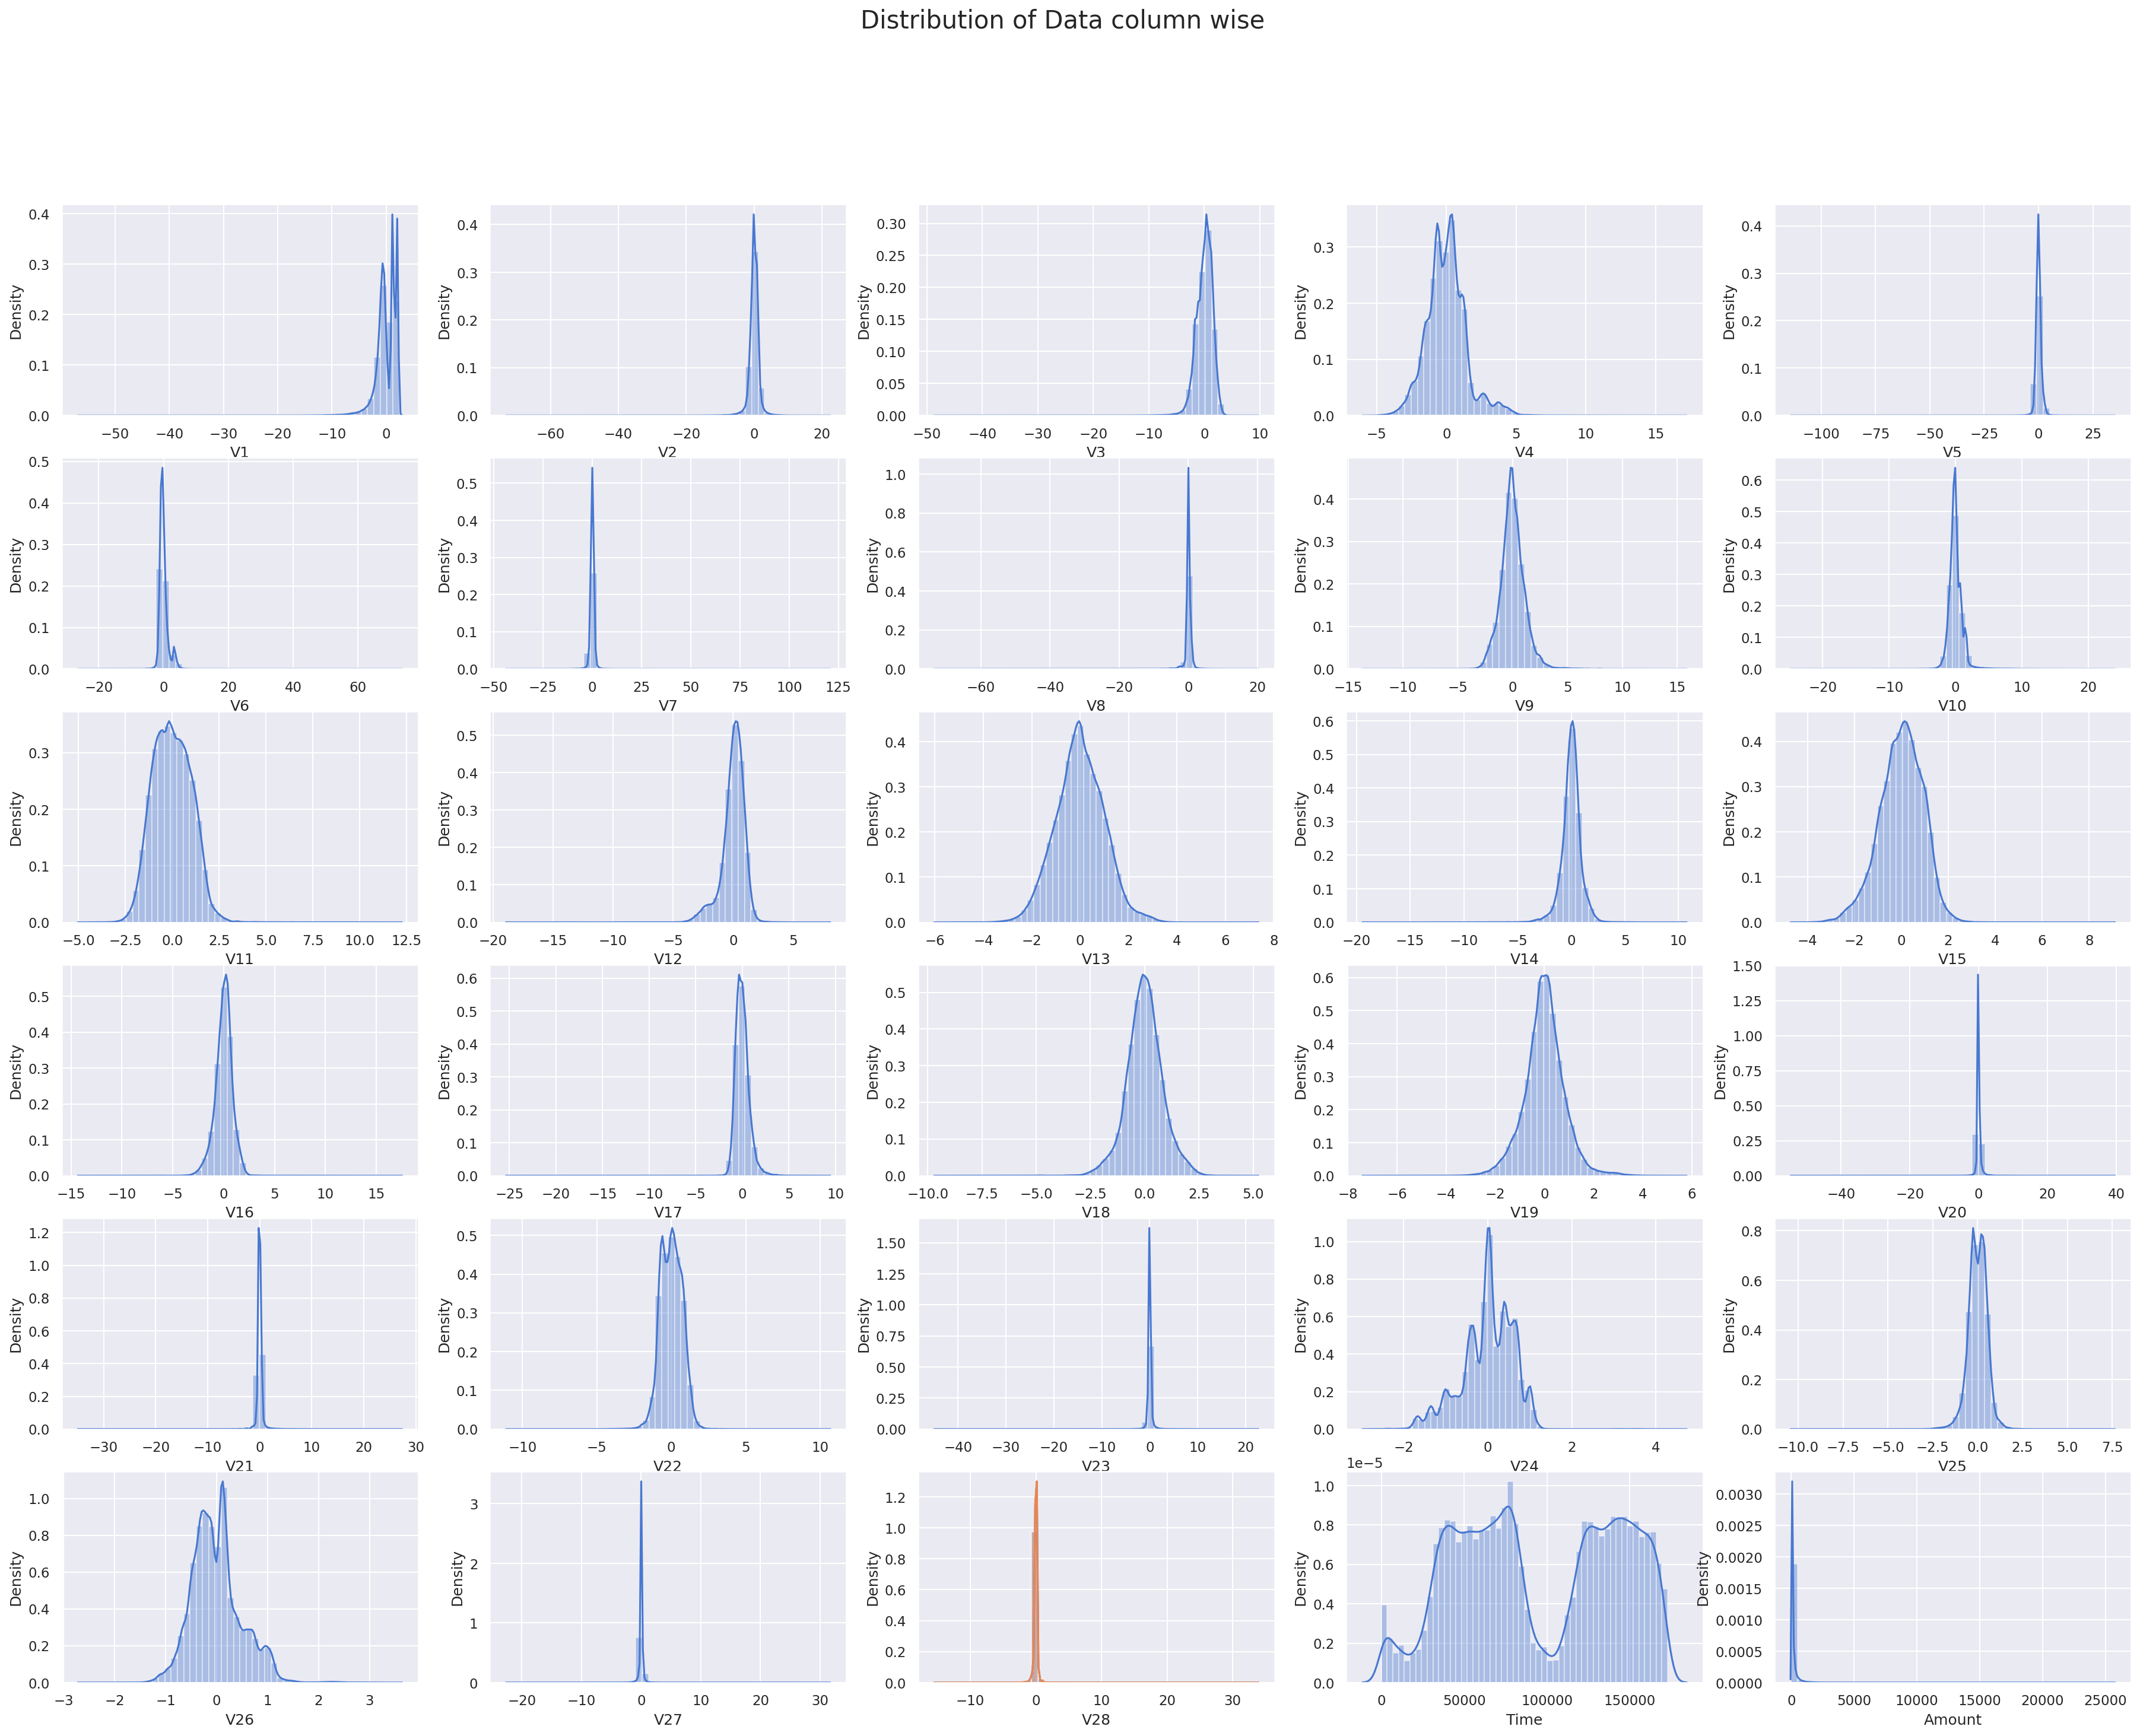

In [47]:
plt.figure(figsize=(30, 22), dpi=150)

plt.subplot(6,5,1)
sns.distplot(data.V1)

plt.subplot(6,5,2)
sns.distplot(data.V2)

plt.subplot(6,5,3)
sns.distplot(data.V3)

plt.subplot(6,5,4)
sns.distplot(data.V4)

plt.subplot(6,5,5)
sns.distplot(data.V5)

plt.subplot(6,5,6)
sns.distplot(data.V6)

plt.subplot(6,5,7)
sns.distplot(data.V7)

plt.subplot(6,5,8)
sns.distplot(data.V8)

plt.subplot(6,5,9)
sns.distplot(data.V9)

plt.subplot(6,5,10)
sns.distplot(data.V10)

plt.subplot(6,5,11)
sns.distplot(data.V11)

plt.subplot(6,5,12)
sns.distplot(data.V12)

plt.subplot(6,5,13)
sns.distplot(data.V13)

plt.subplot(6,5,14)
sns.distplot(data.V14)

plt.subplot(6,5,15)
sns.distplot(data.V15)

plt.subplot(6,5,16)
sns.distplot(data.V16)

plt.subplot(6,5,17)
sns.distplot(data.V17)

plt.subplot(6,5,18)
sns.distplot(data.V18)

plt.subplot(6,5,19)
sns.distplot(data.V19)

plt.subplot(6,5,20)
sns.distplot(data.V20)

plt.subplot(6,5,21)
sns.distplot(data.V21)

plt.subplot(6,5,22)
sns.distplot(data.V22)

plt.subplot(6,5,23)
sns.distplot(data.V23)

plt.subplot(6,5,24)
sns.distplot(data.V24)

plt.subplot(6,5,25)
sns.distplot(data.V25)

plt.subplot(6,5,26)
sns.distplot(data.V26)

plt.subplot(6,5,27)
sns.distplot(data.V27)

plt.subplot(6,5,28)
sns.distplot(data.V28)

plt.subplot(6,5,28)
sns.distplot(data.V28)

plt.subplot(6,5,29)
sns.distplot(data.Time)

plt.subplot(6,5,30)
sns.distplot(data.Amount)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

Interpretation:- 

Here as we can see the distribution of data in all the columns are mixed some columns are normally distributed and some are not in most of the cases and in very few column seems normally distributed data and most column has skewed data. Means data is imbalanced.

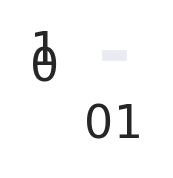

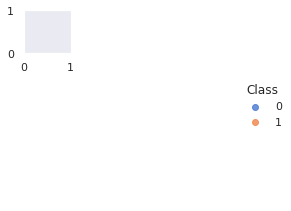

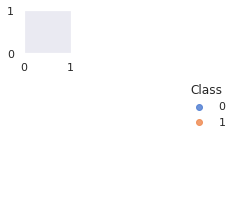

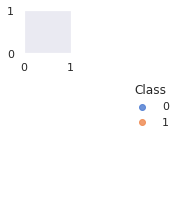

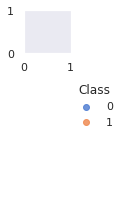

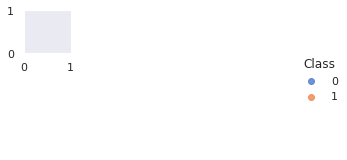

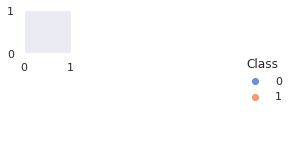

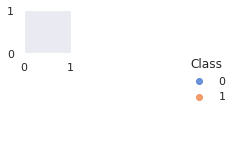

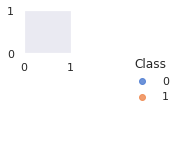

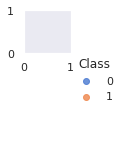

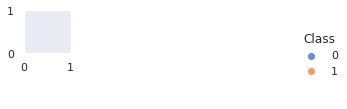

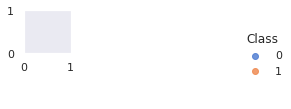

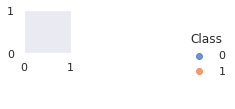

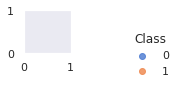

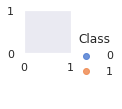

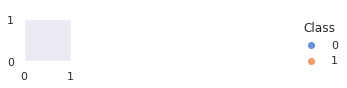

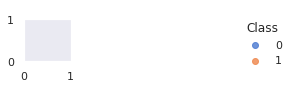

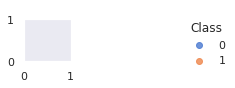

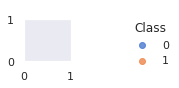

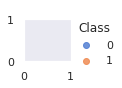

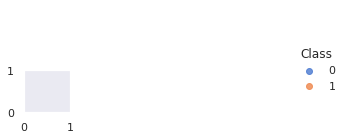

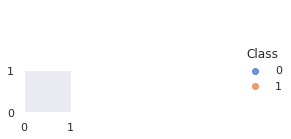

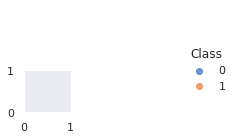

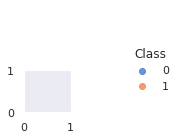

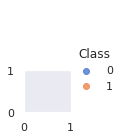

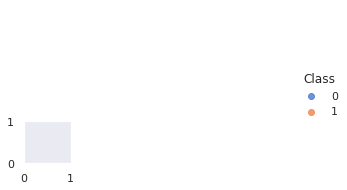

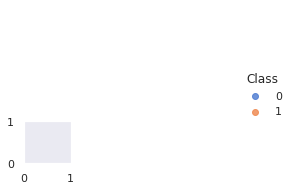

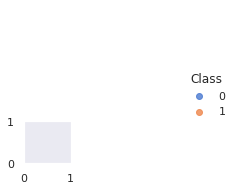

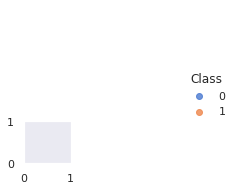

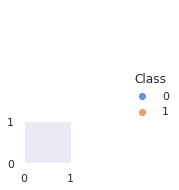

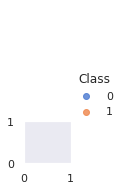

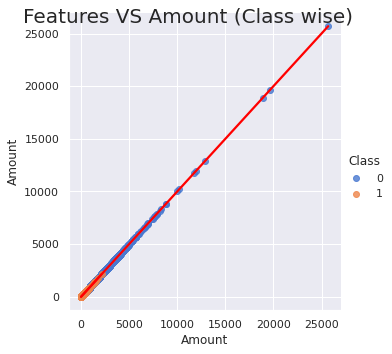

In [43]:
# plt.figure(figsize=(30, 18), dpi=300)
# plt.gcf().set_size_inches(0.75, 0.5)

# plt.subplot(6,5,1)
# sns.lmplot(x='V1', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,2)
# sns.lmplot(x='V2', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,3)
# sns.lmplot(x='V3', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,4)
# sns.lmplot(x='V4', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,5)
# sns.lmplot(x='V5', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,6)
# sns.lmplot(x='V6', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,7)
# sns.lmplot(x='V7', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,8)
# sns.lmplot(x='V8', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,9)
# sns.lmplot(x='V9', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,10)
# sns.lmplot(x='V10', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,11)
# sns.lmplot(x='V11', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,12)
# sns.lmplot(x='V12', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,13)
# sns.lmplot(x='V13', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,14)
# sns.lmplot(x='V14', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,15)
# sns.lmplot(x='V15', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,16)
# sns.lmplot(x='V16', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,17)
# sns.lmplot(x='V17', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,18)
# sns.lmplot(x='V18', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,19)
# sns.lmplot(x='V19', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,20)
# sns.lmplot(x='V20', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,21)
# sns.lmplot(x='V21', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,22)
# sns.lmplot(x='V22', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,23)
# sns.lmplot(x='V23', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,24)
# sns.lmplot(x='V24', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,25)
# sns.lmplot(x='V25', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,26)
# sns.lmplot(x='V26', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,27)
# sns.lmplot(x='V27', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,28)
# sns.lmplot(x='V28', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,28)
# sns.lmplot(x='Time', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,29)
# sns.lmplot(x='Class', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.subplot(6,5,30)
# sns.lmplot(x='Amount', y='Amount', hue='Class', data=data, line_kws={"color": "red"})

# plt.suptitle("Features VS Amount (Class wise)", fontsize=20)
# plt.show()

<Figure size 54x36 with 0 Axes>

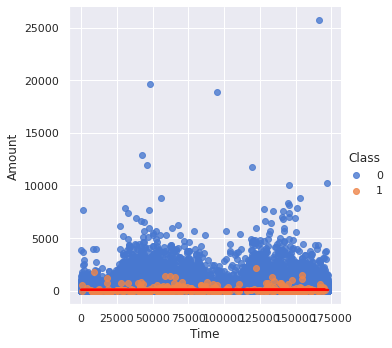

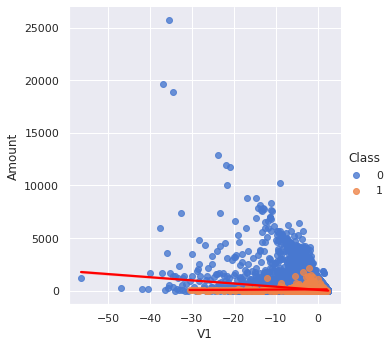

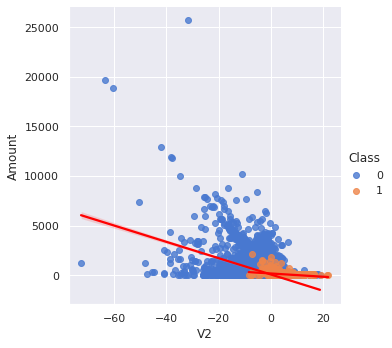

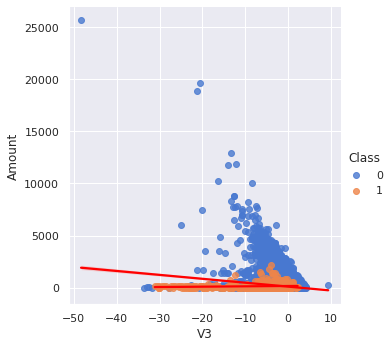

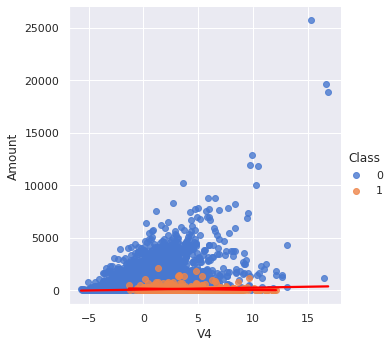

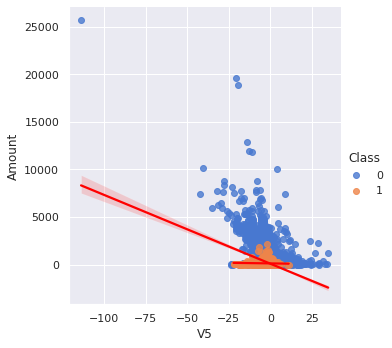

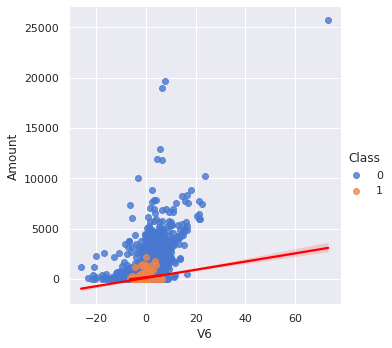

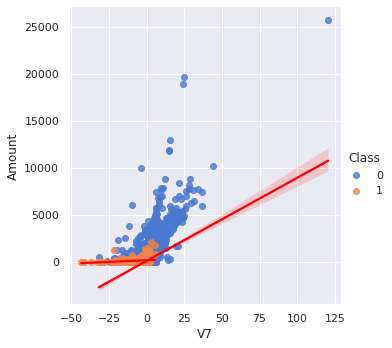

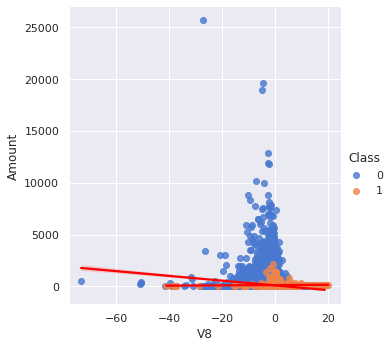

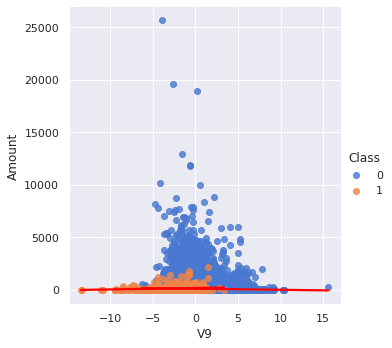

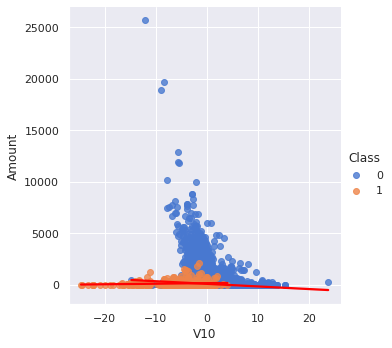

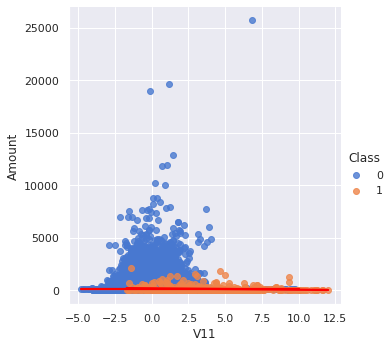

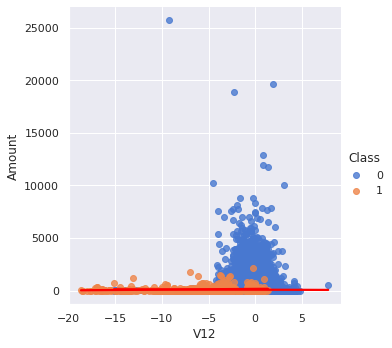

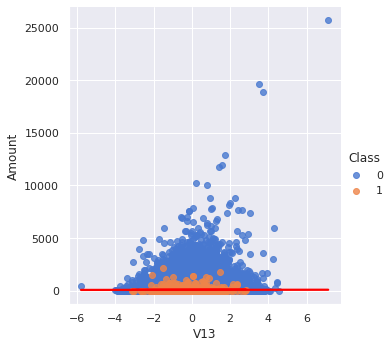

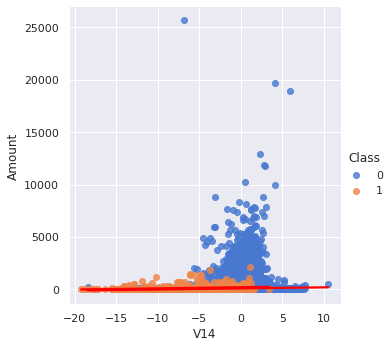

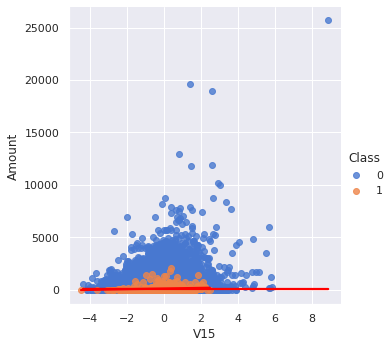

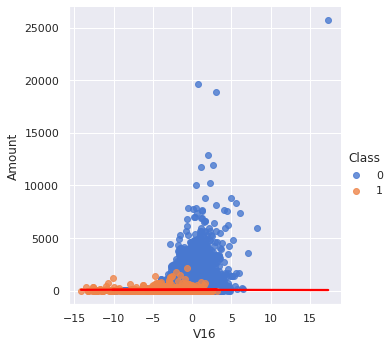

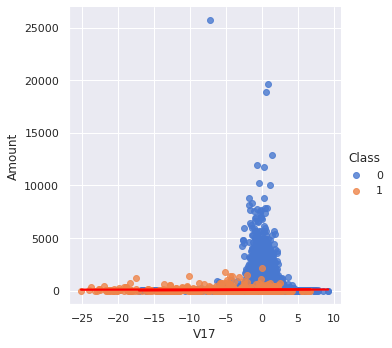

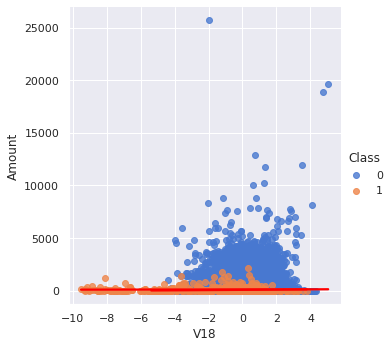

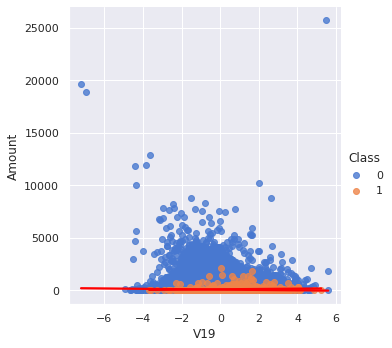

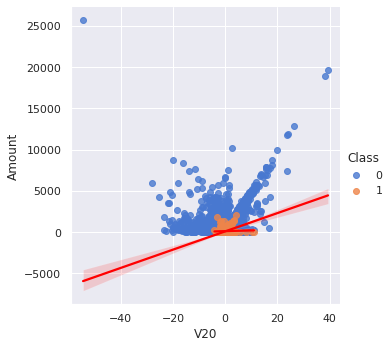

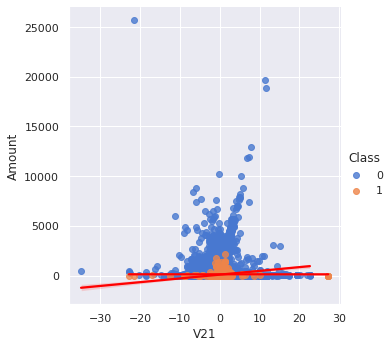

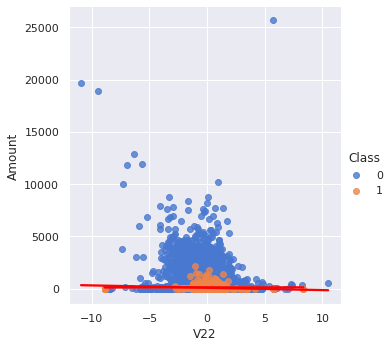

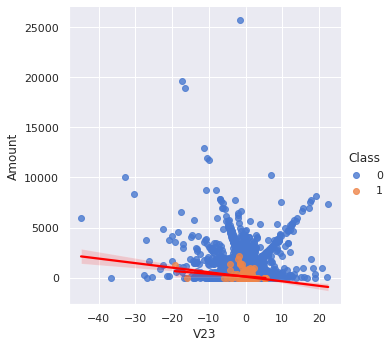

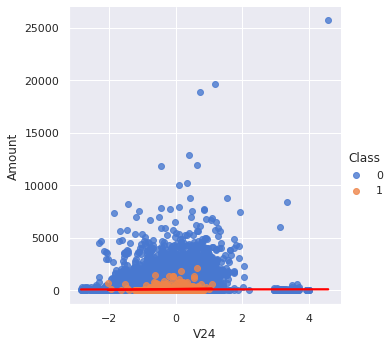

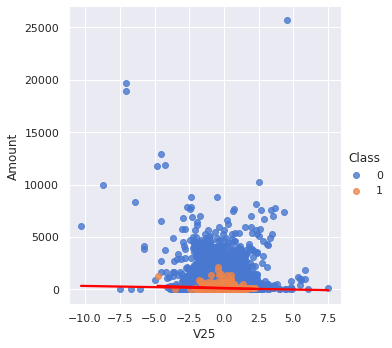

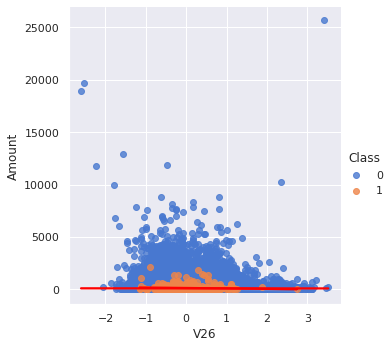

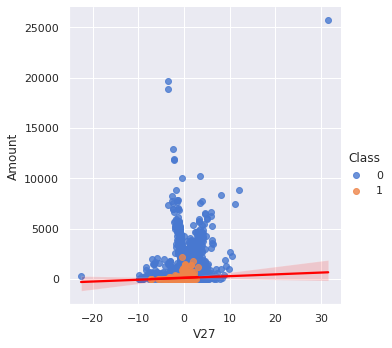

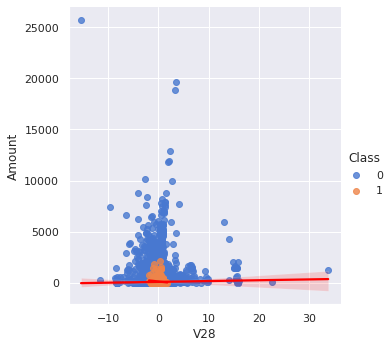

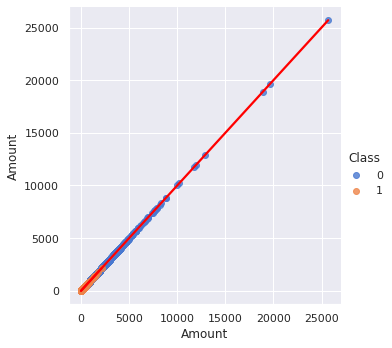

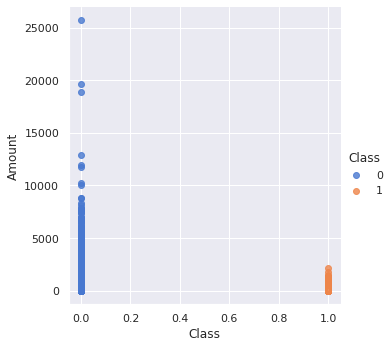

In [44]:
plt.gcf().set_size_inches(0.75, 0.5)
for col in data.columns:
  sns.lmplot(x=col, y='Amount', hue='Class', data=data, line_kws={"color": "red"})
  plt.show()

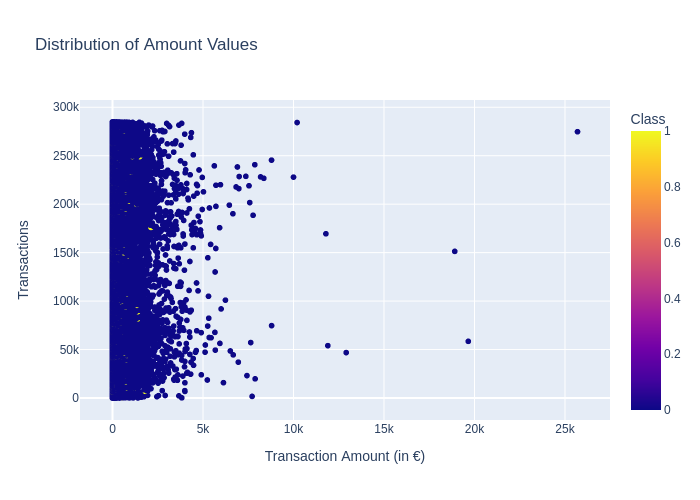

In [ ]:
# Distribution of Amounts in class

fig = px.scatter(data, x = 'Amount', y =data.index, color = data.Class,
                title = 'Distribution of Amount in respect of class')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='Transactions')
fig.show('png')

It looks like most transactions are genuine, represented by the **blue** dots on the chart above. We can also see that all high value transactions were genuine, with apparently **no fraudulent** transaction made being **above €5,000.00**<br><br>
However, it seems hard to identify the fraudulent transactions, painted **yelow**, looking at the distribution of **amount values**. This leaves us with a question: **How many transactions were in fact fraud?**

# Class Distribution

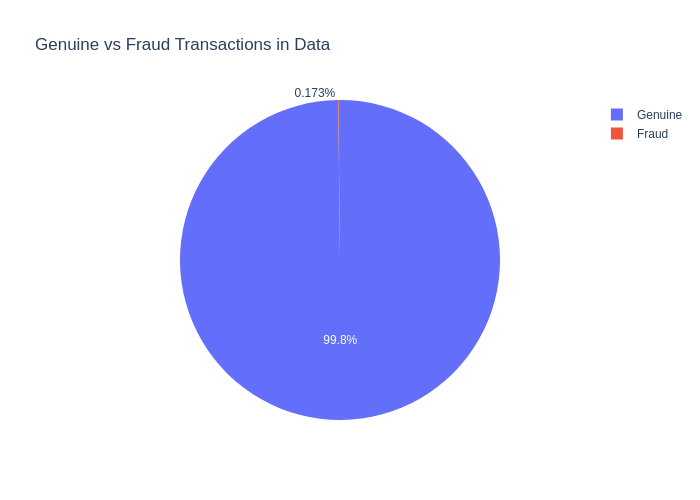

In [45]:
# Visualizing the Class distribution
fig = px.pie(data.Class,values = data.Class.value_counts(),
             names=['Genuine', 'Fraud'], title='Genuine vs Fraud Transactions in Data')
fig.show('png')

In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

So it seems **only 492** transactions in the dataset were **fraudulent** which represents **only 0.173%** of data, there is a **huge class imbalance** that we have to work on here!<br><br>
Let's see some statistics on the amounts of the frauds registered during the analyzed period.

75% percent of frauds were **below** the amount of **€105.89** and the largest fraud amount was €2,125.87. Let's see those values distributed in a chart.

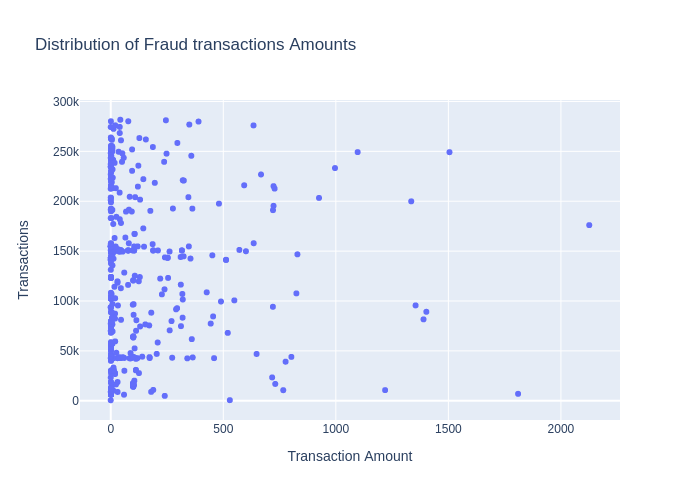

In [46]:
# Distribution of fraud transactions amount
fig = px.scatter(data.query("Class==1"), x = 'Amount', y =data.query("Class==1").index,
                title = 'Distribution of Fraud transactions Amounts')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='Transactions')
fig.show('png')

# Preparing Data

For this project, we won't be using the **time** attribute, so we will remove it.<br><br>
We will also use StandardScaler() to put all the data into the same scale, avoiding bias for a certain attribute when trying to predict our target variable, which is **Class**.

In [ ]:
data = data.drop(columns = ['Time'], axis = 1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Let's now divide our dataset into the **independent variables (X)** and the **target variable (y)**

In [ ]:
features = data.drop(columns=['Class'], axis=1)
target = data.Class

Now, let's split our data into **training set** and **testing set**. I'll split them into a 70/30 proportion, where 70% of our data will be used for **training** while the 30% left will be used for **testing**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= .3, random_state = 7)

In [ ]:
print('X Train size: ', X_train.shape)
print('X Train proportion ', "%s%%"%round((len(X_train) / (len(X_train) + len(X_test))) * 100))
print('X Test size: ', X_test.shape)
print('X Test proportion ', "%s%%"%round((len(X_test) / (len(X_train) + len(X_test))) * 100))

X Train size:  (199364, 30)
X Train proportion  70%
X Test size:  (85443, 30)
X Test proportion  30%


In [ ]:
print('Y Train size: ', y_train.shape)
print('Y Train proportion ', "%s%%"%round((len(y_train) / (len(y_train) + len(y_test))) * 100))
print('Y Test size: ', y_test.shape)
print('Y Test proportion ', "%s%%"%round((len(y_test) / (len(y_train) + len(y_test))) * 100))

Y Train size:  (199364,)
Y Train proportion  70%
Y Test size:  (85443,)
Y Test proportion  30%


Normalizing 'Amount' feature with StandardScaler, separately on each set, in order to avoid **data leakage**.

In [ ]:
# Scaling data on the training set
ss = StandardScaler()
X_train['Amount'] = ss.fit_transform(X_train.Amount.values.reshape(-1,1))
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265192,161778.0,-0.853619,1.555887,-1.252607,-1.185364,0.566558,-1.539334,1.136482,0.191336,-0.224518,0.121626,0.552222,-0.020048,-1.863855,1.412130,-0.680979,-0.402736,-0.323852,0.188291,-0.004926,-0.031217,0.273643,0.898128,-0.154011,0.021482,-0.291636,0.085142,0.470141,0.315054,-0.354471
187986,127777.0,2.131165,0.752452,-3.304095,0.639800,1.464498,-1.461739,0.874949,-0.513757,-0.078550,-1.069429,-0.091803,0.012669,0.644899,-2.599278,-0.067556,0.377349,2.021411,0.548163,-0.194589,-0.064721,-0.080319,0.017213,-0.089519,0.326017,0.469379,0.694803,-0.076660,-0.014127,-0.363769
211485,138432.0,-0.446306,0.237498,0.009691,-2.424586,0.322173,-1.312249,1.787843,-0.362265,0.863343,-2.004072,-0.988150,0.726355,0.002697,0.184517,-0.762826,-0.683440,-0.608005,-0.526537,-0.613061,-0.065646,0.003214,-0.046697,0.237702,-0.066621,-0.336946,-1.524304,0.187908,0.222969,0.185245
5534,5618.0,-8.053149,7.045990,-1.102994,-0.870690,-1.360528,4.754590,-7.669995,-23.464595,3.056101,2.085637,2.225717,-0.278070,0.345162,2.448522,-0.759153,0.149231,2.197302,0.425360,-0.767092,-4.578147,22.565680,-8.420246,3.511462,-0.526480,0.276928,0.207147,1.180975,0.194628,-0.344047
241013,150844.0,-3.277278,-3.859403,-0.263647,0.846649,4.957627,-3.572067,-1.738124,0.167841,-0.236681,-0.564058,0.893670,0.892650,0.634889,-0.494392,0.106317,0.152937,0.137621,1.428300,0.334625,1.351251,0.797666,0.929881,0.772650,-0.405697,-0.216342,-0.164543,0.037588,0.329060,0.042519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235075,148237.0,1.436350,-1.370238,-1.050985,0.140291,0.212884,2.034696,-0.690183,0.551074,0.925016,-0.070907,0.762092,1.186729,0.490319,-0.022620,0.463694,-0.163762,-0.173809,-0.578854,-0.850781,0.263945,0.419450,0.967287,-0.052083,-0.859687,-0.430096,0.669207,-0.024041,-0.028947,0.633146
10742,18229.0,-1.332495,-3.541645,0.641762,5.365468,-1.737751,1.841564,0.736281,0.124130,1.365574,-0.178530,-0.594286,-2.348419,1.013813,0.879708,-2.878164,0.018187,1.199103,-0.640420,-1.664640,2.125589,0.289183,-1.285624,-0.959545,0.057595,-0.175431,-0.200548,-0.183664,0.234996,4.676306
49689,44164.0,-1.934652,1.360003,1.764555,0.417446,-0.715046,0.544573,0.314626,0.647827,0.942191,-0.506699,-1.989415,0.771829,0.172263,-0.942611,-2.519852,-0.481158,0.201039,-0.708737,0.142060,0.037861,-0.516294,-0.905709,-0.141717,-0.127830,0.798190,-0.569269,0.344801,0.179357,-0.079651
189636,128493.0,1.883642,0.157366,-1.354682,1.423561,0.263764,-1.108697,0.659744,-0.369196,-0.239777,0.383643,1.380806,1.689066,0.485224,0.587201,-1.356984,-0.743854,-0.227494,-0.452923,-0.160054,-0.182329,0.168742,0.647247,0.014158,0.521798,0.373066,-0.547959,-0.017936,-0.058844,-0.193565


In [ ]:
# Scaling data on the testing set
scaler = StandardScaler()
X_test['Amount'] = scaler.fit_transform(X_test.Amount.values.reshape(-1,1))
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86801,61401.0,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,-0.582204,-0.123053,0.725415,1.437898,-0.440372,0.745296,0.445074,0.082038,-0.264626,-0.096140,0.021002,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,-0.143676
34867,37861.0,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,-0.563368,0.221611,1.229814,1.488629,0.644534,0.301355,0.680205,-0.599515,0.061674,0.443510,-0.036387,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,-0.287758
151239,95074.0,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,2.327822,1.497152,-3.145007,1.115374,0.899513,0.169817,0.638694,0.264425,1.700873,0.857059,0.684855,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,-0.243778
122560,76607.0,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,-0.085484,-0.425103,0.320393,-0.351914,0.196921,0.463480,-0.395852,0.085578,-0.884918,-0.482589,-0.200455,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,-0.301734
77820,57228.0,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,0.728782,-1.237635,0.116067,1.458800,-0.328680,1.180584,-0.740104,-0.749881,1.698175,-1.023245,-0.408065,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,-0.239963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,19904.0,1.340463,-0.412712,0.772584,-0.232808,-0.938660,-0.473059,-0.676305,-0.167483,0.715489,0.058620,0.980423,-2.294448,2.269806,0.881706,-1.071940,0.127969,1.770870,-2.133726,0.251927,-0.007097,-0.118231,0.076350,0.045261,0.396767,0.442514,-0.275507,0.009296,0.007386,-0.308703
21449,31674.0,-0.444455,0.549358,0.705912,0.881025,1.031932,1.492359,0.765599,0.255018,-0.702037,-0.223611,-0.356858,0.654935,0.846301,0.006274,-0.438363,-0.531736,-0.295247,0.332627,1.671182,0.332021,0.021775,0.134932,-0.164586,-1.673002,0.113462,-0.156995,0.150378,0.125307,0.032430
129577,79141.0,1.220998,-0.713025,0.326478,-0.648490,-0.923778,-0.572551,-0.459058,-0.127369,-0.859433,0.546453,0.040894,-0.350844,0.477937,-0.150946,1.010110,0.849245,0.494705,-1.871655,0.135393,0.216533,0.188447,0.330602,-0.057677,0.104849,0.361265,-0.232163,0.008462,0.027684,-0.004251
197268,131927.0,-1.149813,-1.404393,1.789395,-3.257388,-0.445777,1.164304,-0.139286,-0.000924,-1.863865,0.709096,-0.233151,-0.455030,1.623188,-1.343381,-0.896715,0.617749,-0.826697,1.158094,-0.212036,-0.123636,-0.206387,-0.032293,-0.008664,-0.361832,0.552332,-0.232628,-0.152697,-0.175123,0.305703


Now, considering that we're dealing with **imbalanced** data, we must apply **SMOTE** in order to **oversample** our fraudulent data.<br><br>
SMOTE will synthetically **generate more** samples of fraudulent data based on the frauds that we already have in the original dataset.

In [ ]:
target.value_counts() # 0 = Genuine Transactions | 1 = Fraud

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    199027
1    199027
Name: Class, dtype: int64

Now we have a 50 | 50 data balance between genuine and fraudulent transactions.<br><br>
**Note:** I've **only corrected the imbalance between transactions in the training set**, while maintaining  the **test set** with its original proportions, because **the test set should be a representation of reality**.

## Applying Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

y_predictions_lr = lr.predict(X_test)

# Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100, random_state = 7)
rf.fit(X_train,y_train)

y_predictions_rf = rf.predict(X_test)

# Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

y_predictions_dt = dt.predict(X_test)

# Ada Boost Classifier 
ab = AdaBoostClassifier(n_estimators = 100, random_state = 7)
ab.fit(X_train,y_train)

y_predictions_ab = ab.predict(X_test)

# Gradient Boosting Classifier 
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 7)
gb.fit(X_train,y_train)

y_prediction_gb = gb.predict(X_test)


In [ ]:
# Printing Evaluation Metrics for Logistics Regression
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_lr))],
                         ['Precision',precision_score(y_test, y_predictions_lr)],
                         ['Recall', recall_score(y_test, y_predictions_lr)],
                         ['F1_score',f1_score(y_test, y_predictions_lr)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

## Random Forest Scores

In [ ]:
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_rf))],
                         ['Precision',precision_score(y_test, y_predictions_rf)],
                         ['Recall', recall_score(y_test, y_predictions_rf)],
                         ['F1_score',f1_score(y_test, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999485
1,Precision,0.849057
2,Recall,0.870968
3,F1_score,0.859873


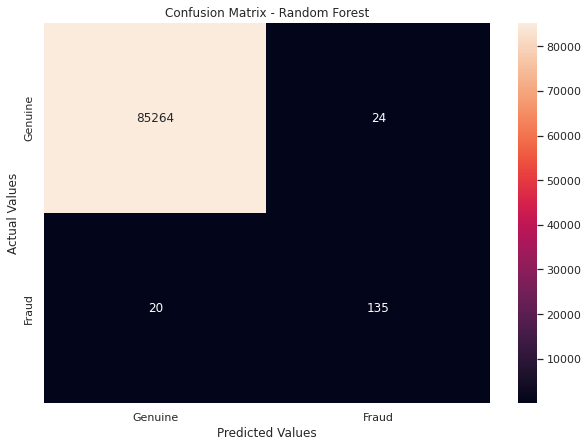

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Decision Tree Scores

In [ ]:
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(y_test, y_predictions_dt))],
                         ['Precision',precision_score(y_test, y_predictions_dt)],
                         ['Recall', recall_score(y_test, y_predictions_dt)],
                         ['F1_score',f1_score(y_test, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,0.997928
1,Precision,0.460432
2,Recall,0.825806
3,F1_score,0.591224


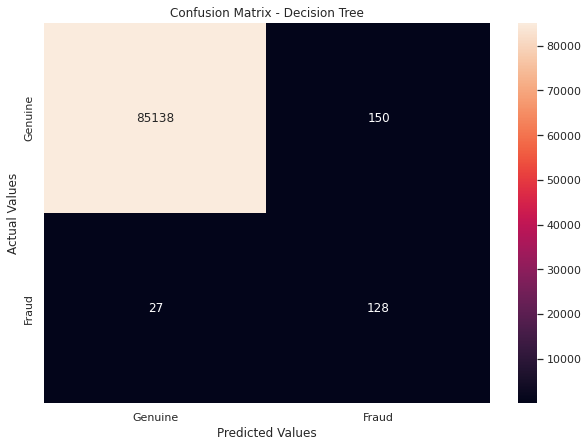

In [ ]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(y_test, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Ada Boost Scores

In [ ]:
# Printing Evaluation Metrics for Ada Boost
metrics_ab = [['Accuracy',(accuracy_score(y_test, y_predictions_ab))],
                         ['Precision',precision_score(y_test, y_predictions_ab)],
                         ['Recall', recall_score(y_test, y_predictions_ab)],
                         ['F1_score',f1_score(y_test, y_predictions_ab)]]
metrics_df_ab = pd.DataFrame(metrics_ab, columns = ['Metrics', 'Results'])
metrics_df_ab

,Metrics,Results
0,Accuracy,0.991784
1,Precision,0.170878
2,Recall,0.916129
3,F1_score,0.288032


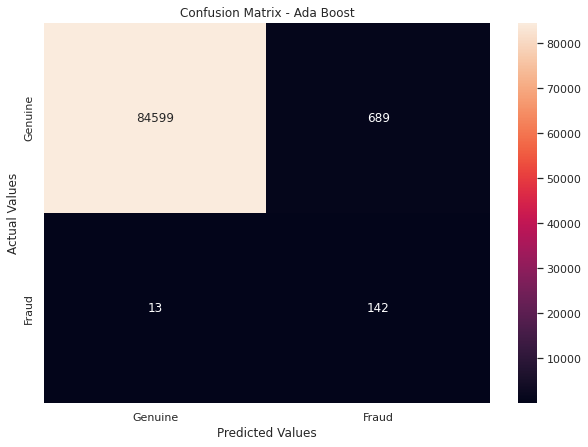

In [ ]:
# Confusion Matrix for Ada Boost
confusion_matrix_ab = confusion_matrix(y_test, y_predictions_ab)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Gradient Boosting Scores

In [ ]:
# Printing Evaluation Metrics for Gradient Boosting
metrics_gb = [['Accuracy',(accuracy_score(y_test, y_prediction_gb))],
                         ['Precision',precision_score(y_test, y_prediction_gb)],
                         ['Recall', recall_score(y_test, y_prediction_gb)],
                         ['F1_score',f1_score(y_test, y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results'])
metrics_df_gb

,Metrics,Results
0,Accuracy,0.993551
1,Precision,0.207965
2,Recall,0.909677
3,F1_score,0.338535


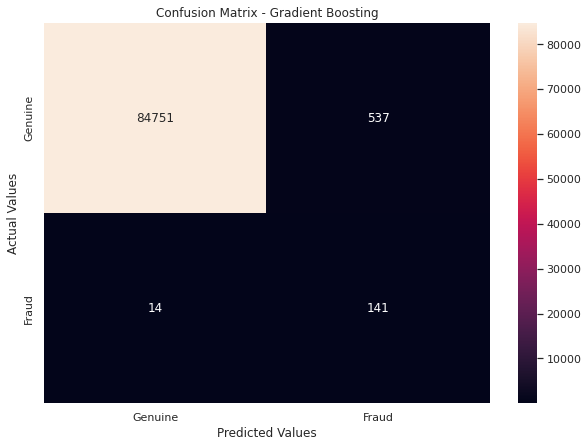

In [ ]:
# Confusion Matrix for Gradient Boosting
confusion_matrix_gb = confusion_matrix(y_test, y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Counting how many fraudulent and how many genuine transactions we have on the testing set
y_test.value_counts()

0    85288
1      155
Name: Class, dtype: int64

Considering we have **160 fraudulent transactions** in our testing set, and the **goal of our model is predicting these fraudulent transactions**, we can realize that the model who **best performed such task** was the **Ada Boost** model who predicted **147 fraudulent transactions out of 160**, with a **91.87% recall**, the highest one of all the models tested, which indicates **how well our model detects fradulent transactions from our testing set**.

In [ ]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(y_test, y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  93.53
Decision Tree ROC AUC Score:  91.2
Ada Boost ROC AUC Score:  95.4
Gradient Boost ROC AUC Score:  95.17


# Conclusion

When we work with a **machine learning model** we must always know for a fact what it is that we're trying to get from that model.<br><br>
In this project, our goal is to **detect fraudulent transactions** when they occur, and the model who best performed that task was the **Ada Boost Classifier** with a **recall of 91.87%**, correctly detecting 147 fraudulent transactions out of 160. However, it is **also important to note** that the Ada Boost classifier had the **biggest amount of false positives**, that is, 1321 **genuine** transactions were mistakenly labeled as fraud, that's 1.54% of all genuine transactions.<br><br>
A genuine purchase being incorrectly identified as a fraud **could be a problem**.<br><br>
In this scenario it is necessary to understand the business and make a few questions such as:<br><br>
- how cheap would a false positive be? <br><br>
- Would we keep the Ada Boost Classifier with the **best performance in detecting frauds**, while also detecting a lot of false positives or should we use the Random Forest Classifier, who also performed pretty well identifiying frauds (82.50% recall) and reduced the number of false positives (0.02% of genuine transactions flagged as fraud). But that would also imply in a larger number of fraudsters getting away with it and customers being mistakenly charged... <br><br>

These questions and a deeper understading of how the business works and how we want to approach solving a problem using machine learning are fundamental for a decision-making process to choose whether or not if we're willing to deal with a larger number of false positives to detect the largest amount of frauds as possible. <br><br>

Thank you so much!<br><br>
*Luís Fernando Torres*